## Observations and Insights 

In [1]:
# Import Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta
import matplotlib.patches as mpatches


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine both data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_mouse_study_results_df = pd.DataFrame(combined_mouse_study_results)

# Check total data count
combined_mouse_study_results_df.head()
combined_mouse_study_results_df['Mouse ID'].agg(['nunique','count','size'])

nunique     249
count      1893
size       1893
Name: Mouse ID, dtype: int64

In [2]:
#get duplicated data:
duplicate_data_DF = combined_mouse_study_results_df[combined_mouse_study_results_df.duplicated(keep=False)]
duplicate_data_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_data = combined_mouse_study_results_df.drop_duplicates("Mouse ID", keep='last') #remove duplicates from "Mouse ID column keeping the last data"
clean_mouse_study_results_data_df = pd.DataFrame(clean_mouse_study_results_data).reset_index(drop=True) # reset index back to 0 for clean dataframe
clean_mouse_study_results_data_df.info()

#note - removed duplicate rows except last occurrence of Mouse ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Drug Regimen        249 non-null    object 
 2   Sex                 249 non-null    object 
 3   Age_months          249 non-null    int64  
 4   Weight (g)          249 non-null    int64  
 5   Timepoint           249 non-null    int64  
 6   Tumor Volume (mm3)  249 non-null    float64
 7   Metastatic Sites    249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.7+ KB


In [4]:
clean_mouse_study_results_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

##### Summary Statistics 1 -   Multiple series (Tumor volume for each regimen)

In [5]:
#Get select data column for calculation
drug_and_tumor = clean_mouse_study_results_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")
# drug_and_tumor.head()

In [6]:
#Get mean and rename column from Tumor Volume (mm3) to mean 
mean = drug_and_tumor.groupby(level=0).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
# mean

In [7]:
#Get median and rename column from Tumor Volume (mm3) to meadian
median = drug_and_tumor.groupby(level=0).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})
# median

In [8]:
#Get variance and rename column from Tumor Volume (mm3) to variance 
variance = drug_and_tumor.groupby(level=0).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})
# variance

In [9]:
#Get std and rename column from Tumor Volume (mm3) to std 
std = drug_and_tumor.groupby(level=0).std()
std = std.rename(columns={"Tumor Volume (mm3)": "std"})
# std

In [10]:
#Get sem and rename column from Tumor Volume (mm3) to sem 
sem = drug_and_tumor.groupby(level=0).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "sem"})
# sem

In [11]:
#Combine all above results in a df and display results
summary_statistics_01_df = pd.concat([ mean, median,variance,std,sem],join='outer', axis=1)
summary_statistics_01_df

# Format columns
format_mapping={'Mean': '{:,.2f}', 'Median': '{:,.2f}', 'Variance': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}

for key, value in format_mapping.items():
    summary_statistics_01_df[key] = summary_statistics_01_df[key].apply(value.format)
    
summary_statistics_01_df

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


#### Summary Statistics 2 -   Single Groupby function (Tumor volume for each regimen)

In [12]:
summary_statistics_2_df = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std","sem"]).reset_index()

#Chenge index and display results
summary_statistics_2_df.set_index("Drug Regimen")

# # Format columns
format_mapping={'mean': '{:,.2f}', 'median': '{:,.2f}', 'var': '{:.2f}','std': '{:.2f}','sem': '{:.2f}'}
for key, value in format_mapping.items():
    summary_statistics_2_df[key] = summary_statistics_2_df[key].apply(value.format)

summary_statistics_2_df.set_index("Drug Regimen") 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

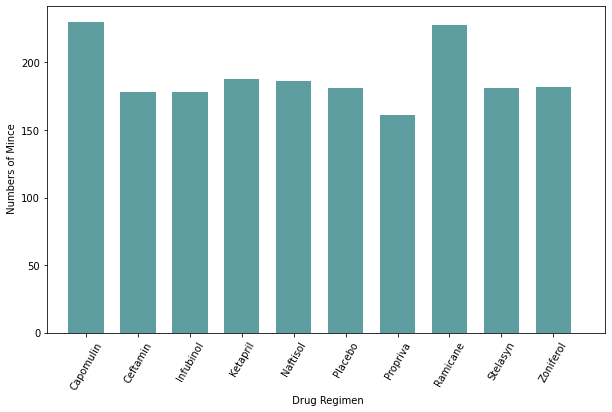

<Figure size 432x288 with 0 Axes>

In [13]:
# Display total number of mice for each treatment throughout the course of the study using pandas.
mice_numbers_and_drug = combined_mouse_study_results_df[["Mouse ID","Drug Regimen"]] #isolate columns
mice_numbers_and_drug =  mice_numbers_and_drug.groupby(["Drug Regimen"]).count() #count numbers of mince by each treatment

mice_numbers_and_drug.plot(kind="bar",legend=False,width=0.68,figsize=(10,6),color='cadetblue',rot=60)

# plt.title("Mince treated per Drug Regimen")
plt.xlabel(" Drug Regimen")
plt.ylabel(" Numbers of Mince")

plt.xlim(-0.75, len(mice_numbers_and_drug), -0.25)


plt.show()
plt.tight_layout()


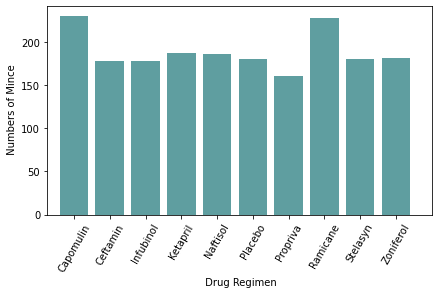

In [14]:
# Display total number of mice for each treatment throughout the course of the study using pyplot.

#Get x-axis and tick location 
x_axis = np.arange(len(mice_numbers_and_drug))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mice_numbers_and_drug["Mouse ID"], color='cadetblue', alpha=1, align="center",)

plt.xticks(tick_locations, mice_numbers_and_drug.index, rotation=60)
plt.tight_layout()

plt.xlim(-0.75, len(x_axis),-0.25)


# plt.title("Mince treated per Drug Regimen")
plt.xlabel(" Drug Regimen")
plt.ylabel(" Numbers of Mince")

plt.show()


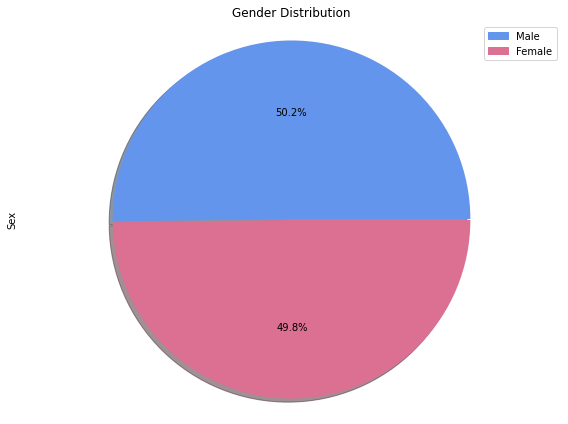

In [15]:
# Display a pie plot showing the distribution of female versus male mice using pandas

#create the pie plot using pandas plot function and adjust standard format
clean_mouse_study_results_data_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True, explode=(0,0.005),
     startangle=0,  fontsize=10, legend=False,figsize=(8, 6),labels=['',''],
     colors = ['cornflowerblue', 'palevioletred'] )

red_patch = mpatches.Patch(color="cornflowerblue", label="Male")
blue_patch = mpatches.Patch(color="palevioletred", label="Female")
plt.legend(handles=[red_patch,blue_patch],loc="best")
plt.title("Gender Distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()

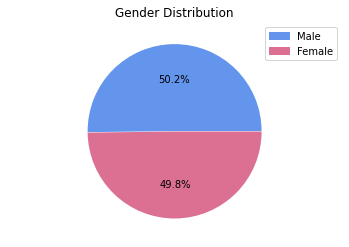

<Figure size 576x432 with 0 Axes>

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Gender Distribution")
labels = ["", ""]

red_patch = mpatches.Patch(color="cornflowerblue", label="Male")
blue_patch = mpatches.Patch(color="palevioletred", label="Female")
plt.legend(handles=[red_patch,blue_patch],loc="best")

colors = ['cornflowerblue', 'palevioletred']

explode = (0, 0.005)
plt.axis("equal")

male_and_female = clean_mouse_study_results_data_df[["Mouse ID","Sex"]]
male_and_female = male_and_female.set_index("Mouse ID")

males_fameles_count = male_and_female.value_counts()

#create the pie plot using pyplot function and adjust  format to much with the pandas
plt.pie(males_fameles_count,explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.figure(figsize=(8, 6))


plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin

# Sort values for calculation
sorting_values = clean_mouse_study_results_data_df.sort_values(['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']).groupby('Mouse ID').head(4).set_index('Drug Regimen')
# sorting_values

#get the last (greatest) timepoint for each mouse for all treatment regimens and preview
timepoint_volume = sorting_values.nlargest(4, 'Timepoint',keep='all')
timepoint_volume_df = pd.DataFrame(timepoint_volume)
tumor_volume = timepoint_volume_df['Tumor Volume (mm3)']
tumor_volume_df= pd.DataFrame(tumor_volume)
tumor_volume_df  

#Get data for the four of the treatment regimens required and preview
selected_treatment_regimens = tumor_volume_df .loc[['Capomulin', 'Ramicane','Infubinol','Ceftamin'],:]
# selected_treatment_regimens

In [18]:
#Get IQR and print result
quartiles = selected_treatment_regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Q1 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.25)
Q3 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.75)
median = quartiles[0.5]
IQR = (Q3 - Q1)
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

Lower_quartile = '{:,.2f}'.format(Q1)
Upper_quartile = '{:,.2f}'.format(Q3)
interquartile_range = '{:,.2f}'.format(IQR)
median =  '{:,.2f}'.format(median)
lower_bound = '{:,.2f}'.format(lower_bound)
upper_bound = '{:,.2f}'.format(upper_bound)

quartile_calculations_df = pd.DataFrame({"Lower quartile" : [Lower_quartile], 
                                        "Upper quartile ": [Upper_quartile] ,
                                        "Interquartile range" : [interquartile_range],
                                        "Median" : [median],
                                         "Lower bound" :[lower_bound],
                                        "upper bound" :[upper_bound]})




print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartile_calculations_df

Values below -9.51 could be outliers.
Values above 105.14 could be outliers.


,Lower quartile,Upper quartile,Interquartile range,Median,Lower bound,upper bound
0,33.48,62.14,28.66,40.16,-9.51,105.14


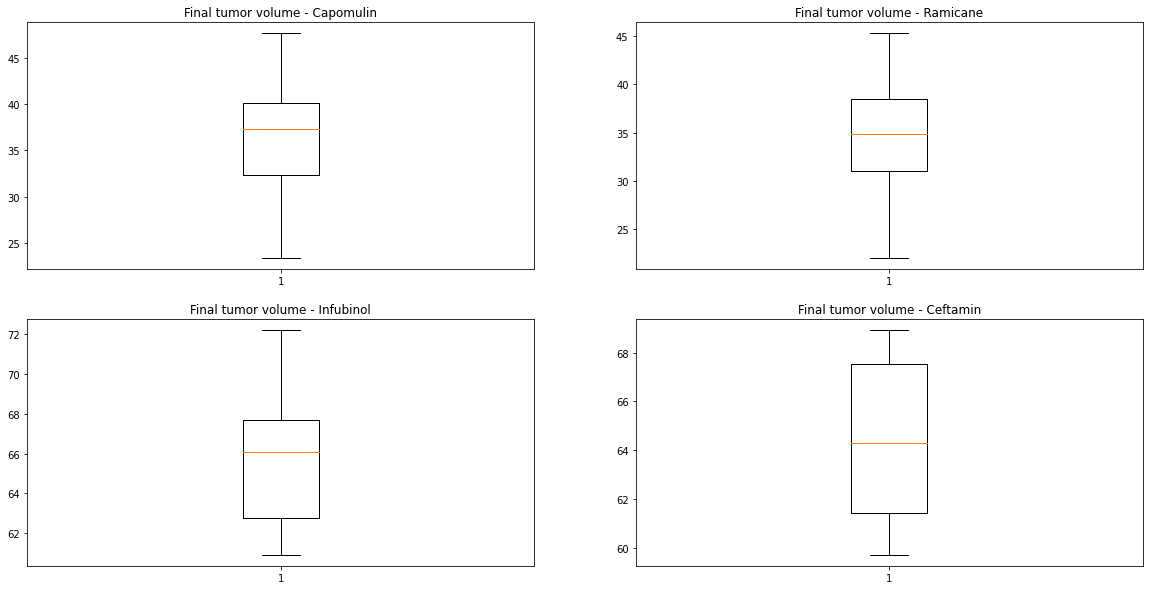

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of intere

# # Generate the plot data for each regimens 
selected_treatment = selected_treatment_regimens.reset_index()
selected_treatment.value_counts()

#Get data for each regimens and convert to list
Capomulin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Capomulin']
Ramicane = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ramicane']
Infubinol = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Infubinol']
Ceftamin = selected_treatment.loc[selected_treatment['Drug Regimen'] == 'Ceftamin']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,10))
ax1.boxplot(Capomulin['Tumor Volume (mm3)'])
ax1.set_title('Final tumor volume - Capomulin')
ax1.set_ylabel('')

ax2.boxplot(Ramicane['Tumor Volume (mm3)'])
ax2.set_title('Final tumor volume - Ramicane')
ax2.set_ylabel('')

ax3.boxplot(Infubinol['Tumor Volume (mm3)'])
ax3.set_title('Final tumor volume - Infubinol')
ax3.set_ylabel('')

ax4.boxplot(Ceftamin['Tumor Volume (mm3)'])
ax4.set_title('Final tumor volume - Ceftamin')
ax4.set_ylabel('')
plt.show()



#https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timepoint_volume = combined_mouse_study_results_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']]
timepoint_volume_df= pd.DataFrame(timepoint_volume)
timepoint_volume = timepoint_volume_df.set_index("Drug Regimen")  

# #Get data for Capomulin and preview
Capomulin_time_tumor_vol = timepoint_volume .loc[['Capomulin'],:]
# Capomulin_time_tumor_vol.head()



In [21]:
# Plot timepoint as a line chart

# ramdom select a mouse
i = Capomulin_time_tumor_vol['Mouse ID'].sample(axis = 0)
i


Drug Regimen
Capomulin    g316
Name: Mouse ID, dtype: object

In [24]:
# Use "i" value ( still need to work to make interactive)

mouse_s_data = Capomulin_time_tumor_vol[(Capomulin_time_tumor_vol['Mouse ID'] == 'g316')]
mouse_s_data

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,g316,45.000000,0
Capomulin,g316,44.022752,5
Capomulin,g316,44.502042,10
Capomulin,g316,45.216743,15
Capomulin,g316,45.933322,20
Capomulin,g316,46.809225,25
Capomulin,g316,44.221480,30
Capomulin,g316,44.702833,35
Capomulin,g316,45.565821,40


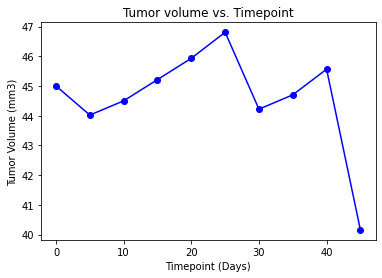

In [32]:
# get data for ramdom mouse

tumor = mouse_s_data['Tumor Volume (mm3)']
time = mouse_s_data['Timepoint']
plt.plot(time, tumor, color='Blue', marker = 'o')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume vs. Timepoint')
plt.show()

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mouse_weight = sorting_values.loc[['Capomulin'],['Tumor Volume (mm3)','Weight (g)']]
# Capomulin_mouse_weight.head()

In [34]:
mean_tumor_vol_cap = Capomulin_mouse_weight.groupby('Tumor Volume (mm3)').mean()
mean_tumor_vol_cap = mean_tumor_vol_cap.reset_index()
# mean_tumor_vol_cap.head()

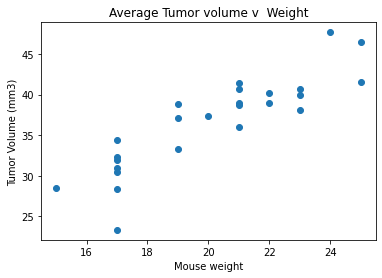

In [35]:
plt.title('Average Tumor volume v  Weight')
plt.xlabel('Mouse weight')
plt.ylabel("Tumor Volume (mm3)" )

plt.scatter(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

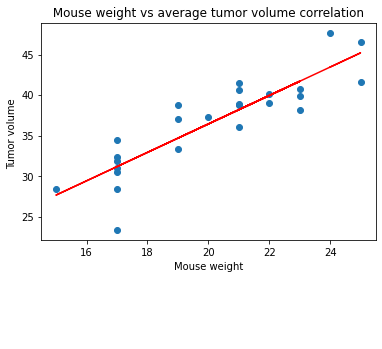

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.88


In [36]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = mean_tumor_vol_cap['Weight (g)']
y_values = mean_tumor_vol_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="black")

plt.title(' Mouse weight vs average tumor volume correlation ')
plt.xlabel('Mouse weight')
plt.ylabel("Tumor volume " )
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])[0],2)}")

### Final Observations

#ramicane and ceftamin have normal distribuition  
#copolumin and infubinol positive skew
#Values below -9.51 could be outliers.
#Values above 105.14 could be outliers.